In [14]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}",
                                     r"\usepackage{amsmath}"]

In [5]:
from sklearn import datasets

digits = datasets.load_digits()

In [4]:
print(digits.data.shape)
print(digits.data)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [6]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


In [10]:
digits_df=pd.DataFrame(digits.data)
digits_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [12]:
diglab_df=pd.DataFrame(digits.target)
diglab_df.describe()

,0
count,1797.000000
mean,4.490818
std,2.865304
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


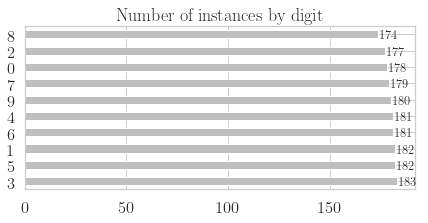

In [114]:
plot1=diglab_df[0].value_counts().plot(kind='barh', color='0.75', title='Number of instances by digit', figsize=(7,3));
values=diglab_df[0].value_counts()/1797
values_df=values.to_frame()
values_df['Count']= pd.Series(["{0:.2f}%".format(val * 100) for val in values_df[0]], index = values_df.index)

for i, v in enumerate(diglab_df[0].value_counts()):
   plot1.text(v + 1, i-0.25 , str(v), fontsize='x-small')
plot1

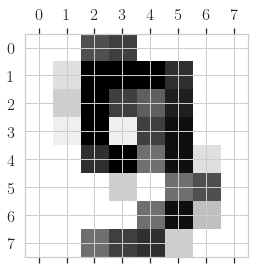

In [133]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

plt.matshow(digits.images[9], cmap='binary')



In [116]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
from sklearn import svm

clf = svm.SVC(gamma=0.0001, C=100.)

We call our estimator instance `clf`, as it is a classifier. **It now must be fitted to the model, that is, it must learn from the data**. This is done by passing our training set to the `fit` method. As a training set, let us use all the images of our dataset apart from the last one. We select this training set with the `[:-1]` Python syntax, which produces a new array that contains **all but the last entry** of `digits.data`:

In [8]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now you can predict new values, in particular, we can ask to the classifier what is the digit of our last image in the digits dataset, which we have not used to train the classifier:

In [9]:
clf.predict(digits.data[-1:]) # you need it to be a matrix of at list 2D

array([8])

The corresponding image is the following.
As you can see, it is a challenging task: the images are of poor resolution.

## Cross-validation
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`. 

Scikit-learn has a collection of classes which can be used to generate lists of train/test indices for popular cross-validation strategies.

They expose a `split` method which accepts the input dataset to be split and yields the train/test set indices for each iteration of the chosen cross-validation strategy.

Let's try with a smaller subset of the `digits` dataset.

In [24]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5) 
print(digits.data[:30])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0. 10. ...  1.  0.  0.]
 [ 0.  0.  9. ... 12. 11.  0.]]


In [26]:
from sklearn.model_selection import KFold, cross_val_score

clf = svm.SVC(gamma=0.0001, C=100.) # Empty classifier
k_fold = KFold(n_splits=5) # Object that helps us to do k-fold cross-validation
for train_indices, test_indices in k_fold.split(digits.data[:30]): # consider the first 30 examples
    print('Train: %s | test: %s' % (train_indices, test_indices))
    clf.fit(digits.data[train_indices], digits.target[train_indices])
    print('Fold test accuracy:', clf.score(digits.data[test_indices], digits.target[test_indices]))

Train: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] | test: [0 1 2 3 4 5]
Fold test accuracy: 0.6666666666666666
Train: [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] | test: [ 6  7  8  9 10 11]
Fold test accuracy: 0.8333333333333334
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29] | test: [12 13 14 15 16 17]
Fold test accuracy: 1.0
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29] | test: [18 19 20 21 22 23]
Fold test accuracy: 1.0
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] | test: [24 25 26 27 28 29]
Fold test accuracy: 1.0


Let's now try with the whole dataset.

In [27]:
score = []
clf = svm.SVC(gamma=0.0001, C=100.)
k_fold = KFold(n_splits=10)
for train_indices, test_indices in k_fold.split(digits.data):
    clf.fit(digits.data[train_indices], digits.target[train_indices])
    score.append(clf.score(digits.data[test_indices], digits.target[test_indices]))
print('Average accuracy:', np.mean(score))

Average accuracy: 0.9716170080695219


As a shortcut, we can use `cross_val_score`.

In [11]:
score_2 = cross_val_score(clf, digits.data, digits.target, cv=k_fold, n_jobs=-1)
print('Average accuracy:', np.mean(score_2))

Average accuracy: 0.97161700807


## Grid-search

Scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score

clf = svm.SVC(gamma=0.01, C=10.)
Cs = np.logspace(-1, 3, 9) # Values that we are going to try for C to find the "Best C". We need it to be log because small changes in C do not reflect al effect on the classifier
Gs = np.logspace(-7, -0, 8) # Idem for gamma
clf = GridSearchCV(estimator=clf, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1)

score = []
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(digits.data):
    clf.fit(digits.data[train_indices], digits.target[train_indices]) # for each split it is trying out every combination of Cs and gammas. That is 9*8 classifiers for every loop of the for. 
    score.append(clf.score(digits.data[test_indices], digits.target[test_indices]))
    print('Best C:', clf.best_estimator_.C,
          'Best gamma:', clf.best_estimator_.gamma,
          'Fold test accuracy:', score[-1])
print('Average accuracy:', np.mean(score))

Best C: 3.16227766017 Best gamma: 0.001 Fold test accuracy: 0.977777777778
Best C: 3.16227766017 Best gamma: 0.001 Fold test accuracy: 0.95
Best C: 3.16227766017 Best gamma: 0.001 Fold test accuracy: 0.983286908078
Best C: 3.16227766017 Best gamma: 0.001 Fold test accuracy: 0.988857938719
Best C: 1.0 Best gamma: 0.001 Fold test accuracy: 0.958217270195
Average accuracy: 0.971627978954


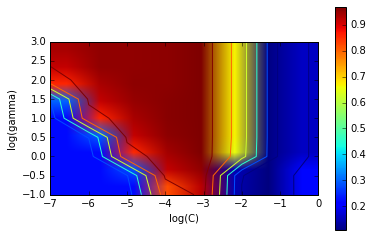

In [35]:
# Grid results for last fold
scores = clf.cv_results_['mean_test_score'].reshape(len(Cs), len(Gs))
extent = np.log10([Gs[0], Gs[-1], Cs[0], Cs[-1]])
im = plt.imshow(scores, extent=extent, origin='lower')
plt.colorbar(im)
plt.contour(np.log10(Gs), np.log10(Cs), scores)
plt.xlabel('log(C)')
plt.ylabel('log(gamma)')

## Decision Trees

In [35]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

k_fold = KFold(n_splits=10)
clf = tree.DecisionTreeClassifier(criterion = "entropy")
score_tree = cross_val_score(clf, digits.data, digits.target, cv=k_fold, n_jobs=-1)

print('Average accuracy:', np.mean(score_tree))


Average accuracy: 0.809158907510863


Average accuracy: 0.809158907510863
